In [2]:
%matplotlib inline
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import json
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
# from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random

# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [3]:
# load data 


#pd.set_option('display.max_columns', 500)
df = pd.read_csv('/Users/apple/python-introduction-caitlinwang/data/hw2data.csv')

df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017


b) Set to be the y variable in the dataframe from a and X to be the remaining features.

In [30]:
X = df.drop(labels='y',axis=1)
y = df['y']


c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

In [31]:
X = X.as_matrix().astype(np.float)
y = y.as_matrix().astype(np.float)
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)



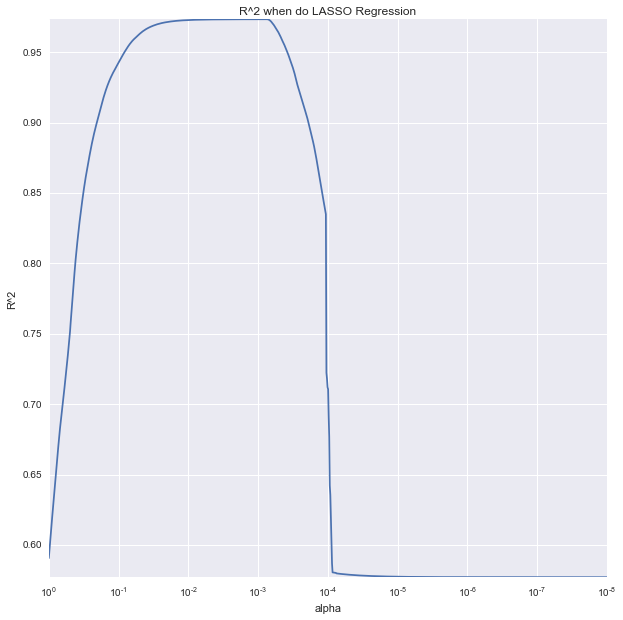

index 614
alpha 0.000825879938784
Best score 0.973364658541


In [18]:
#split data to training and testing part
import numpy
# parameter setting
alphas = np.logspace(-8, 0, 1000)
clf = Lasso()
# coefs = numpy.ones([1000,500])
i = 0
scores=[]

# use Lasso to do the regularization
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test,y_test))
#     coefs[i,:] = clf.coef_
#     i +=1
    
# # plot coefficient change    
# fig = plt.figure(1)
# fig.set_size_inches(10,10)
# axes = fig.add_subplot(1,1,1)
# axes.plot(alphas, coefs)
# axes.set_xscale('log')
# axes.set_xlim(axes.get_xlim()[::-1])  # reverse axis
# plt.xlabel('alpha')
# plt.ylabel('weights')
# plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')

index_opt = np.array(scores).argmax()
opt_alpha = alphas[index_opt]
opt_score = max(scores)
#plot the R^2
fig = plt.figure(2)
fig.set_size_inches(10,10)
axes = fig.add_subplot(1,1,1)
axes.plot(alphas, scores)
axes.set_xscale('log')
axes.set_xlim(axes.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('R^2 when do LASSO Regression')
plt.axis('tight')

plt.show()
print "index",index_opt
print "alpha",opt_alpha
print "Best score", opt_score

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

Optimal regularization parameter : 0.00079049276227


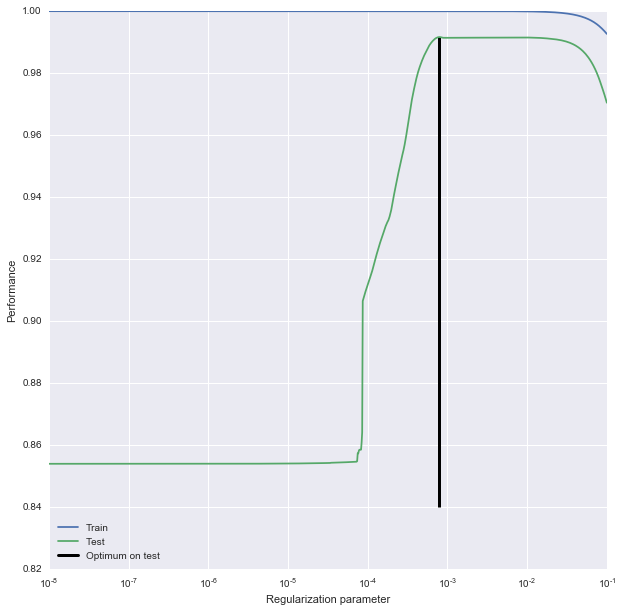

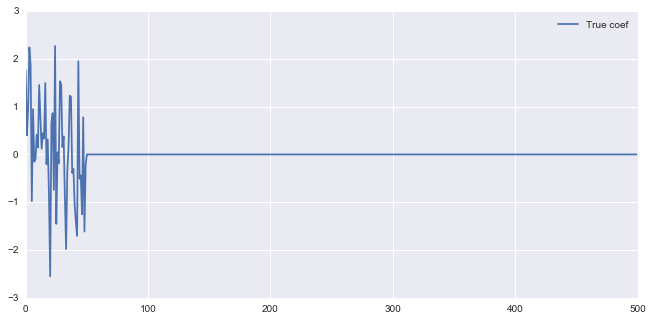

In [46]:

import matplotlib.pyplot as plt
import numpy as np


alphas = np.logspace(-8, -1, 1000)
clf = Lasso()
train_errors = list()
test_errors = list()
for alpha in alphas:
    clf.set_params(alpha=alpha)
    clf.fit(X_train, y_train)
    train_errors.append(clf.score(X_train, y_train))
    test_errors.append(clf.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
clf.set_params(alpha=alpha_optim)
coef = clf.fit(X, y).coef_
coef_ = clf.fit(X_train,y_train).coef_


fig = plt.figure(1)
fig.set_size_inches(10,10)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
# plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef
fig = plt.figure(2)
fig.set_size_inches(10,10)
plt.subplot(2, 1, 2)
plt.plot(coef, label='True coef')
plt.plot(coef_, label='Estimated coef')
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()


e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


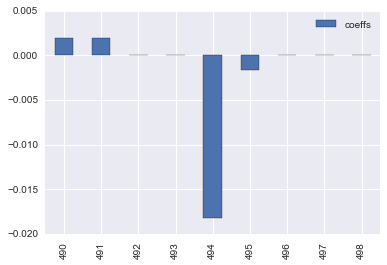

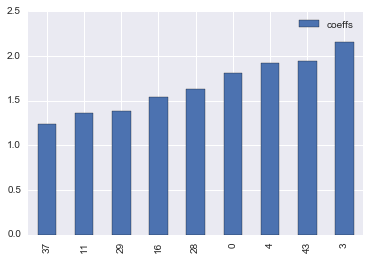

In [54]:
X = df.drop(labels='y',axis=1)

clf.set_params(alpha=alpha_optim)
coef_ = clf.fit(X_train,y_train).coef_

df_coeffs = pd.DataFrame({'coeffs':coef_, 'name':X.columns.values})
df_coeffs[-10:-1].plot(y='coeffs',kind='bar')

df_coeffs=df_coeffs.sort(['coeffs'])
df_coeffs[-10:-1].plot(y='coeffs',kind='bar')


For the figure one,I plot the last ten coeffecient without sorting, as we can see there are a lot 0s in the coeffecients. The reason for it is that we are using LASSO to do the regularization, using the L1 norm penalty tends to set all the coefficents to zeros and eliminating the unimportant features.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

/Library/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:238: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Library/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


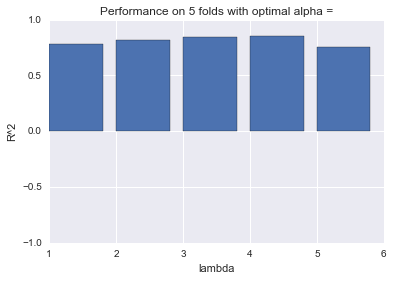

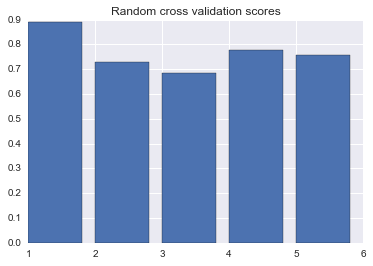

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
clf = Lasso(alpha=alpha_optim)
scores = cross_val_score(clf, X, y, cv=5)

plt.ylim([-1,1])
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with optimal alpha =')
plt.bar(range(1,6),scores)
plt.show()

# Random cross validation scores
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scorer = cross_val_score(clf, X, y, cv=cv)

plt.bar(range(1, 6), scorer)
plt.title('Random cross validation scores')
plt.show()


As we can see the model works well the R^2 is pretty approximate to 1 and the standard deviation is small.
And then we try to shuffle the data and choose the subset randomly and as we can see we still have good results. So it's a good model

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [56]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs



scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=alpha_optim)

In [60]:
def get_coeffs(coeffs):
    """compute the average coefficients and the standard deviation """
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

/Library/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


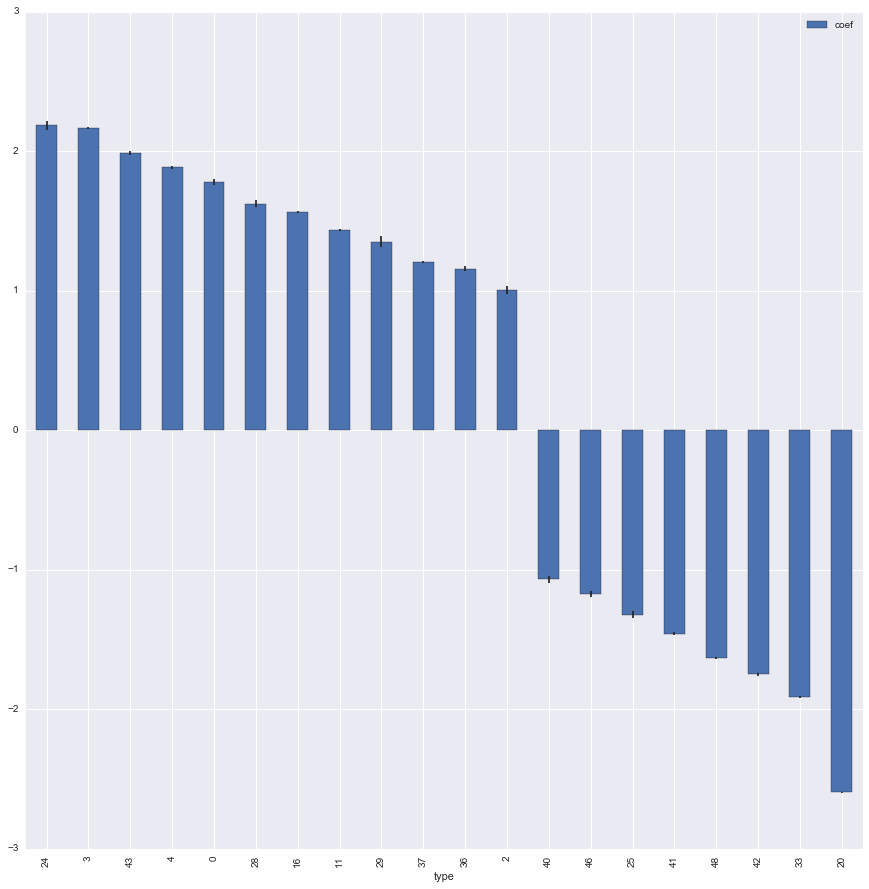

In [58]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))